# Exploring Fitbit user data

## 1 Data cleaning and calculations

In [1]:
# Import libraries
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load csv-file 1
df_1 = pd.read_csv("steps.csv", sep=";")

df_1.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Load csv-file 2
df_2 = pd.read_csv("survey.csv")

df_2.head()

,id,city,gender,age,hh_size,education,education_1,height,weight
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [3]:
# Merge csv's
df = pd.merge(df_1, df_2, on="id")

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,12-5-2014,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,1129.0,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0


In [4]:
# Calculate mean steps per user per day
df_1 = df_1.drop(columns=["id"])
df_1["mean"] = round(df_1.mean(axis=1), 0)
df["mean"] = df_1["mean"]

df.head()

,id,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,...,13-5-2014,city,gender,age,hh_size,education,education_1,height,weight,mean
0,1,NaN,NaN,NaN,NaN,3941.0,15733.0,9929.0,12879.0,10541.0,...,NaN,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,10206.0
1,2,NaN,NaN,10473.0,705.0,4287.0,5507.0,4024.0,3926.0,14595.0,...,NaN,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,5687.0
2,3,NaN,11428.0,12523.0,2553.0,190.0,2164.0,8185.0,9630.0,8983.0,...,NaN,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,8302.0
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,3633.0
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,5312.0


## 2 The distribution of mean steps per day

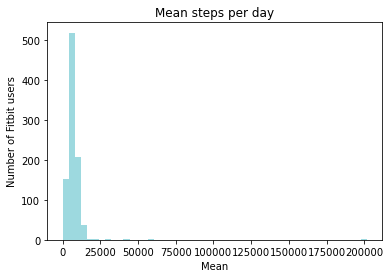

In [5]:
# Plot first histogram
sns.distplot(df["mean"].dropna(), kde=False, color="#0aa0af")
plt.title("Mean steps per day")
plt.ylabel("Number of Fitbit users")
plt.xlabel("Mean")
plt.show()

The histogram is distorted, because the data contains some improbable outliers. To get a better view of the data, let's remove these outliers:

In [6]:
# Remove improbable outliers
df["mean"] = df["mean"].apply(pd.to_numeric, errors="coerce")

def above_20000(x):
    if(x > 20000):
        return float("NaN")
    else:
        return x

# Apply function to all elements inside the column
df["mean"] = df["mean"].apply(above_20000)

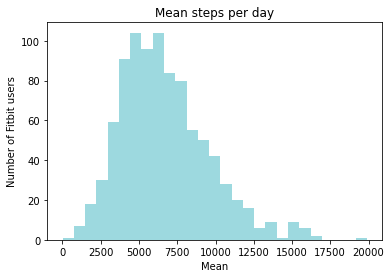

In [7]:
# Plot adjusted histogram
sns.distplot(df["mean"].dropna(), kde=False, color="#0aa0af")
plt.title("Mean steps per day")
plt.ylabel("Number of Fitbit users")
plt.xlabel("Mean")
plt.show()

## 3 Central tendency

Let's visualise some of the core graph characteristics in the histogram by adding a density plot, ticks, median, and mean:

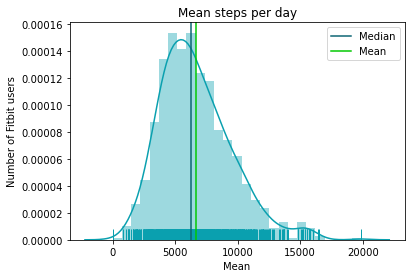

In [8]:
# Calculate mean and median
mean_size = df["mean"].mean()
median_size = df["mean"].median()

# Plot adjusted histogram
sns.distplot(df["mean"].dropna(), kde=True, rug=True, color="#0aa0af")
plt.title("Mean steps per day")
plt.ylabel("Number of Fitbit users")
plt.xlabel("Mean")
plt.axvline(median_size, 0, 100, color="#0a6473", label="Median")
plt.axvline(mean_size, 0, 100, color="#00c800", label='Mean')
plt.legend()
plt.show()

What sticks out:

* The graph shows one peak (mode) around 5.000 steps a day
* The graph is right-skewed; the mean is slightly higher than the median
* Median: 6.237 steps per day
* Mean: 6.672 steps per day

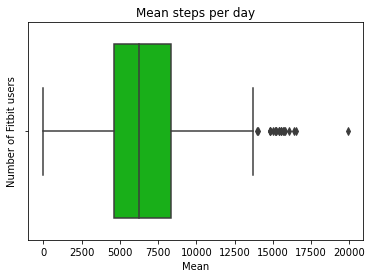

In [9]:
# Plot boxplot
sns.boxplot(df["mean"], color="#00c800")
plt.title("Mean steps per day")
plt.ylabel("Number of Fitbit users")
plt.xlabel("Mean")
plt.show()

The boxplot shows that on average, 50% of Fitbit users walk 5.000-8.300 steps a day. There is one extreme outlier of 20.000 mean steps a day.

## 4 Time series

To plot a time series of the mean steps per day over all Fitbit users, let's first calculate the correct mean:

In [10]:
# Drop the column mean
df_1 = df_1.drop(columns=["mean"])

# Calculate mean steps per day over all users
df_1.loc["mean"] = df_1.mean()

df_1.tail()

,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,25-6-2013,26-6-2013,27-6-2013,28-6-2013,29-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
926,NaN,NaN,NaN,1623.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
927,NaN,NaN,14411.000000,14364.000000,26629.000000,13092.000000,9266.000000,14949.000000,43238.000000,6.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
928,NaN,3324.00000,4507.000000,14364.000000,4098.000000,7299.000000,11534.000000,10125.000000,7700.000000,8459.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3642.416667,9034.72428,10889.636691,7402.847973,8110.370056,8690.810198,8362.570122,8261.913158,9231.391408,7202.258278,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN


Transposing the table will help to create a processable column out of the dates and means:

In [11]:
# Transpose df
df_1 = df_1.transpose()

df_1.head()

,0,1,2,3,4,5,6,7,8,9,...,920,921,922,923,924,925,926,927,928,mean
20-6-2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3642.416667
21-6-2013,NaN,NaN,11428.0,NaN,NaN,16924.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4571.0,NaN,NaN,NaN,3324.0,9034.724280
22-6-2013,NaN,10473.0,12523.0,NaN,NaN,14411.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10471.0,NaN,NaN,14411.0,4507.0,10889.636691
23-6-2013,NaN,705.0,2553.0,NaN,NaN,5121.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5899.0,NaN,1623.0,14364.0,14364.0,7402.847973
24-6-2013,3941.0,4287.0,190.0,NaN,NaN,29784.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,15295.0,NaN,NaN,26629.0,4098.0,8110.370056


In [12]:
# From the index create a column date
df_1["date"] = df_1.index

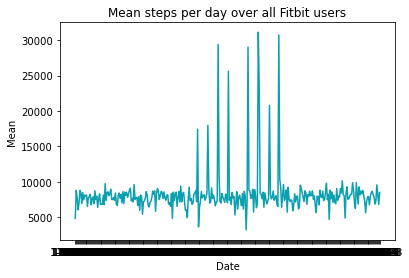

In [15]:
# Plot time series
sns.lineplot(x="date", y="mean", data=df_1, color="#0aa0af")
plt.title("Mean steps per day over all Fitbit users")
plt.ylabel("Mean")
plt.xlabel("Date")
plt.show()

The line graph fluctuates between 5.000-10.000 daily steps. It shows two low points and eight high points up to 30.000 daily steps, which are all located in the centre of the graph. As the mean is calculated over all 929 Fitbit users, these highs and lows are quite remarkable. Perhaps the summer holidays play a role in this large variance?